Extracting features from audio files.


Processing SURPRISE: 100%|█████████████████████████████████████████████████████████| 1000/1000 [00:36<00:00, 27.65it/s]


Feature extraction complete. Features and labels saved.


C:\Users\Tazbin\AppData\Local\Temp\ipykernel_12976\1073585694.py:77: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


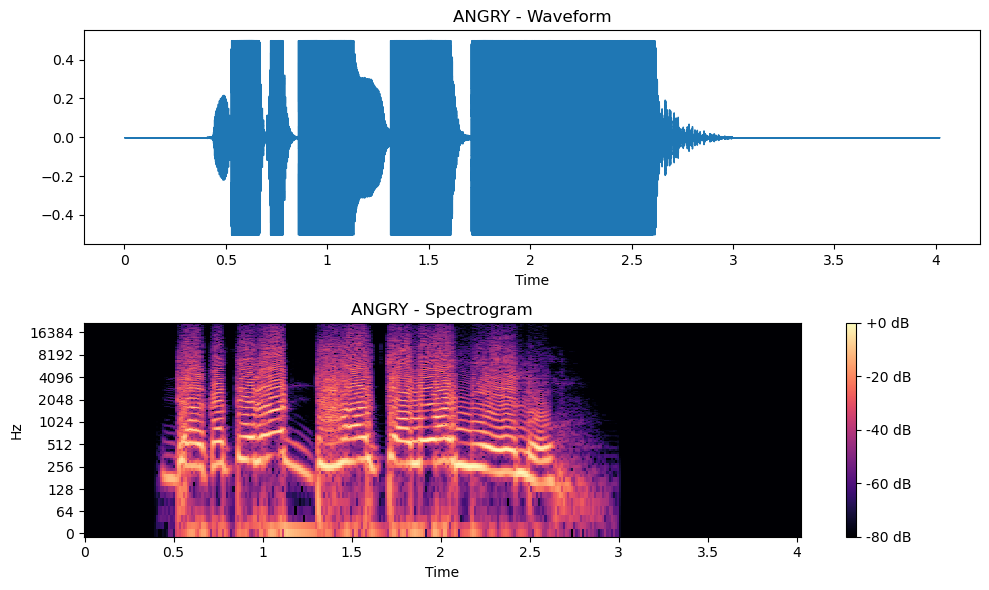

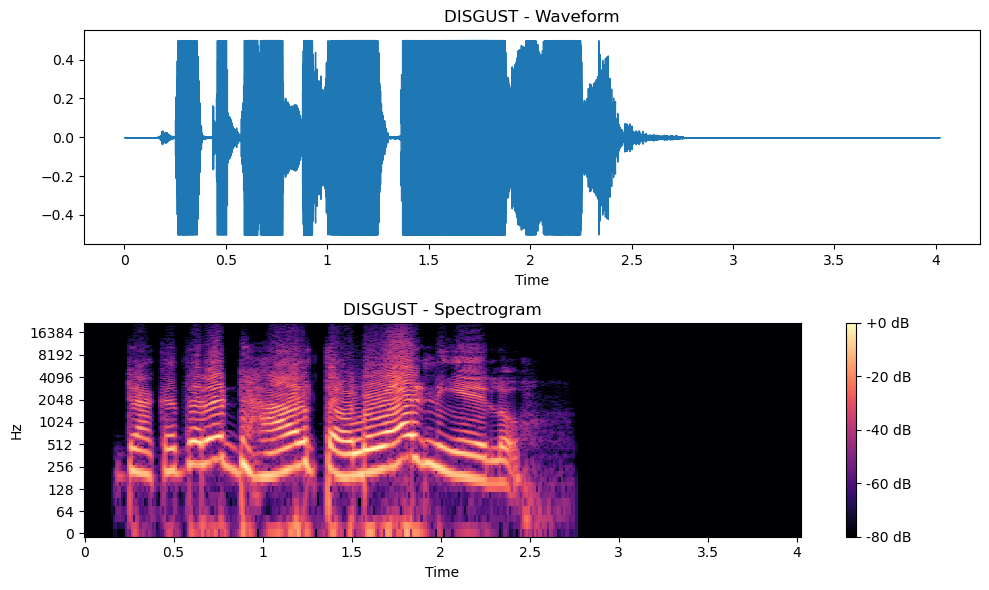

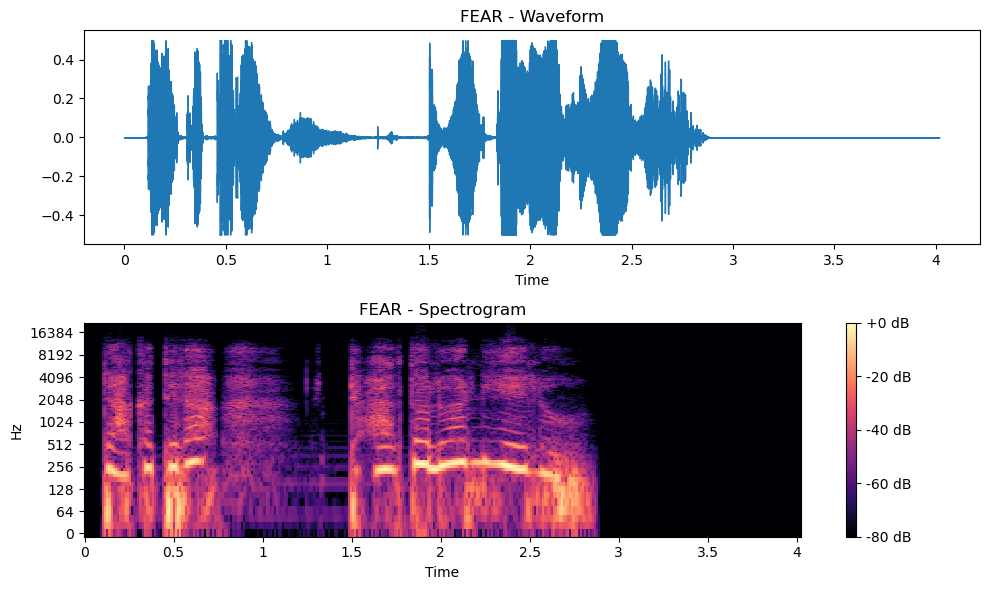

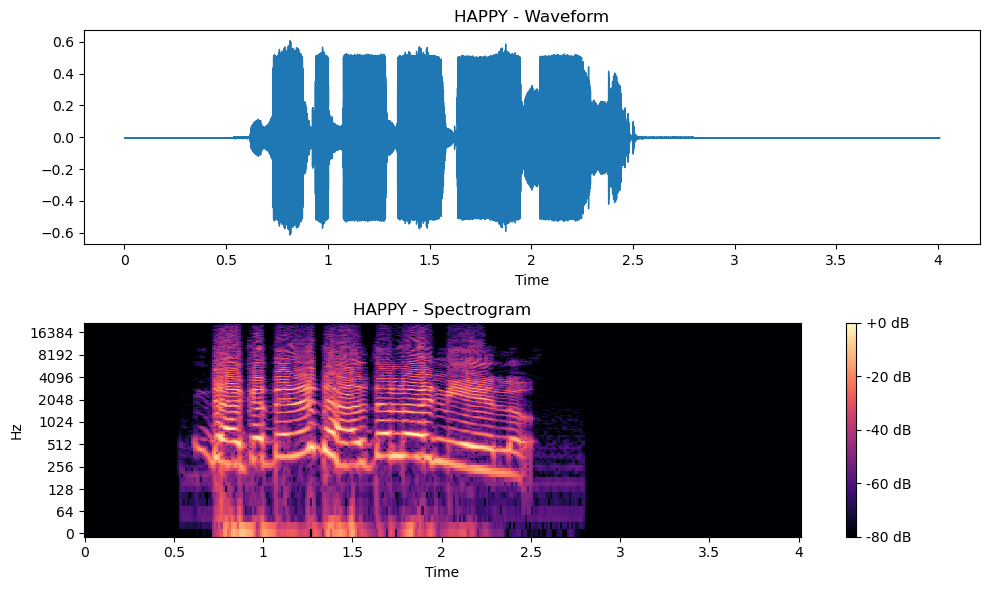

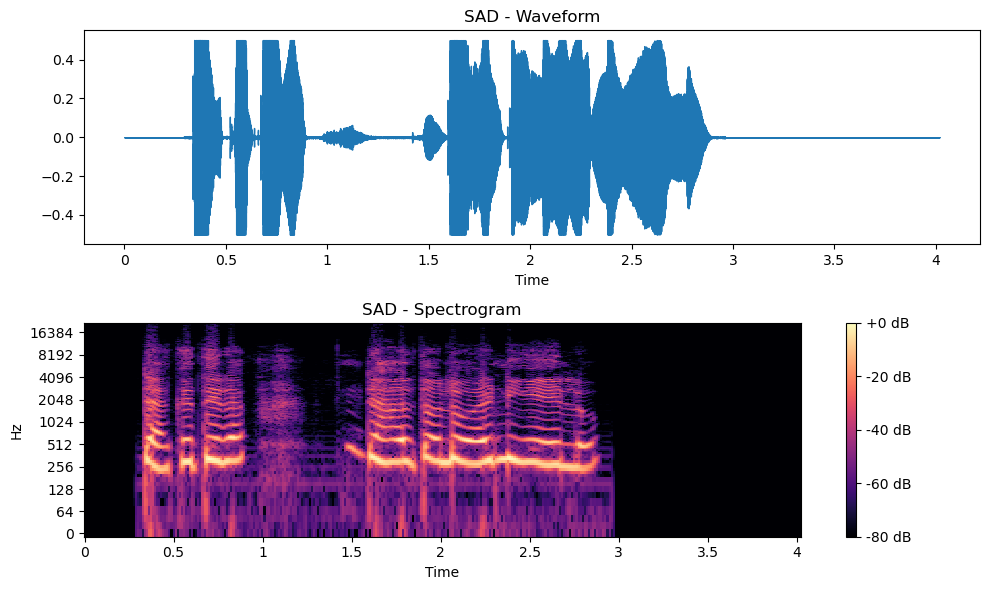

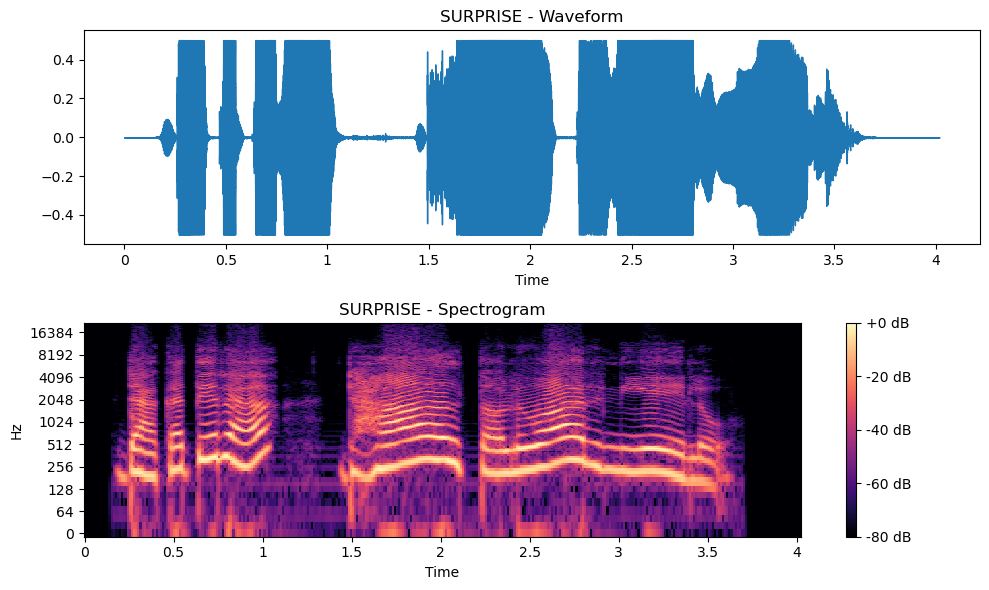

In [8]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from tqdm import tqdm

# Path to your dataset and features folder
data_path = 'F:/MS Thesis/Research/Voice'
features_path = 'F:/MS Thesis/Research/NewFeature'  # Ensure this exists

# Function to extract MFCC features from audio files
def extract_features(file_path, n_mfcc=13):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfcc.T, axis=0)  # Return mean MFCC over time

# Function to load or extract data
def load_or_extract_data(data_path, features_path):
    features_file = os.path.join(features_path, 'features.npy')
    labels_file = os.path.join(features_path, 'labels.npy')
    
    # Check if the features and labels are already saved
    if os.path.exists(features_file) and os.path.exists(labels_file):
        print("Loading pre-extracted features and labels.")
        features = np.load(features_file)
        labels = np.load(labels_file)
    else:
        print("Extracting features from audio files.")
        labels = []
        features = []
        
        for emotion in os.listdir(data_path):
            emotion_folder = os.path.join(data_path, emotion)
            if os.path.isdir(emotion_folder):
                for file in tqdm(os.listdir(emotion_folder), desc=f"Processing {emotion}"):
                    if file.endswith('.wav'):
                        file_path = os.path.join(emotion_folder, file)
                        features.append(extract_features(file_path))
                        labels.append(emotion)

        features = np.array(features)
        labels = np.array(labels)

        # Save features and labels for future use
        np.save(features_file, features)
        np.save(labels_file, labels)
    
    print("Feature extraction complete. Features and labels saved.")
    return features, labels

# Run feature extraction
features, labels = load_or_extract_data(data_path, features_path)

# Visualize waveform and spectrogram for each class
def plot_waveform_and_spectrogram_for_all_classes(data_path):
    # List all emotion classes (folders in the data_path)
    emotion_classes = [emotion for emotion in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, emotion))]
    
    for emotion_class in emotion_classes:
        # Find an audio file for the given emotion class
        emotion_folder = os.path.join(data_path, emotion_class)
        if os.path.isdir(emotion_folder):
            for file in os.listdir(emotion_folder):
                if file.endswith('.wav'):
                    file_path = os.path.join(emotion_folder, file)
                    y, sr = librosa.load(file_path, sr=None)

                    # Plot waveform
                    plt.figure(figsize=(10, 6))
                    plt.subplot(2, 1, 1)
                    librosa.display.waveshow(y, sr=sr)
                    plt.title(f'{emotion_class} - Waveform')

                    # Plot spectrogram
                    plt.subplot(2, 1, 2)
                    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
                    librosa.display.specshow(D, x_axis='time', y_axis='log', sr=sr)
                    plt.title(f'{emotion_class} - Spectrogram')
                    plt.colorbar(format='%+2.0f dB')

                    plt.tight_layout()
                    plt.show()
                    break  # Plot only the first file for each emotion class

# Plot waveform and spectrogram for all emotion classes
plot_waveform_and_spectrogram_for_all_classes(data_path)


Plotting MFCC for F:/MS Thesis/Research/Voice\ANGRY\F_01_OISHI_S_10_ANGRY_1.wav (Emotion: ANGRY)


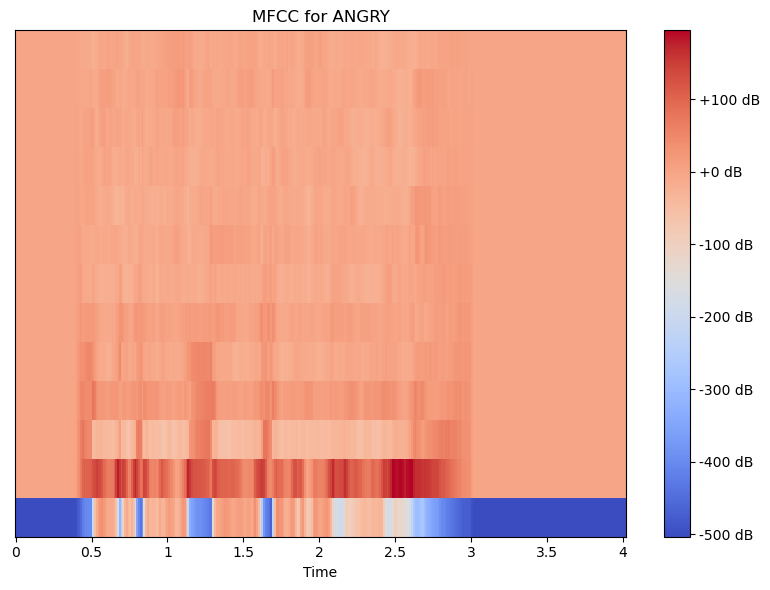

Plotting MFCC for F:/MS Thesis/Research/Voice\DISGUST\F_01_OISHI_S_10_DISGUST_1.wav (Emotion: DISGUST)


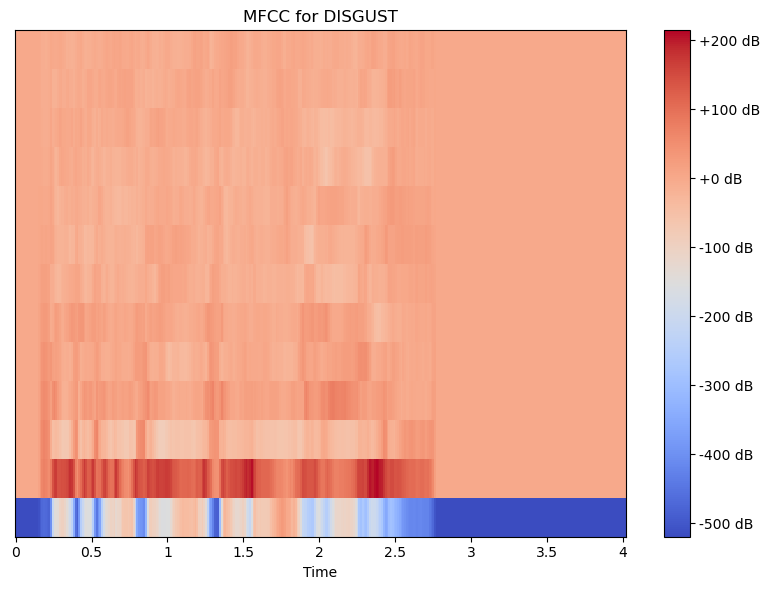

Plotting MFCC for F:/MS Thesis/Research/Voice\FEAR\F_01_OISHI_S_10_FEAR_1.wav (Emotion: FEAR)


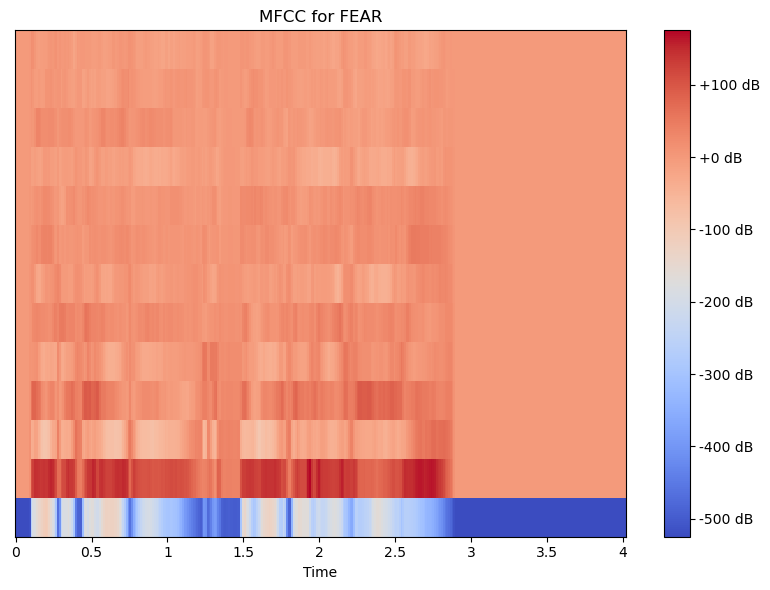

Plotting MFCC for F:/MS Thesis/Research/Voice\HAPPY\F_01_OISHI_S_10_HAPPY_1.wav (Emotion: HAPPY)


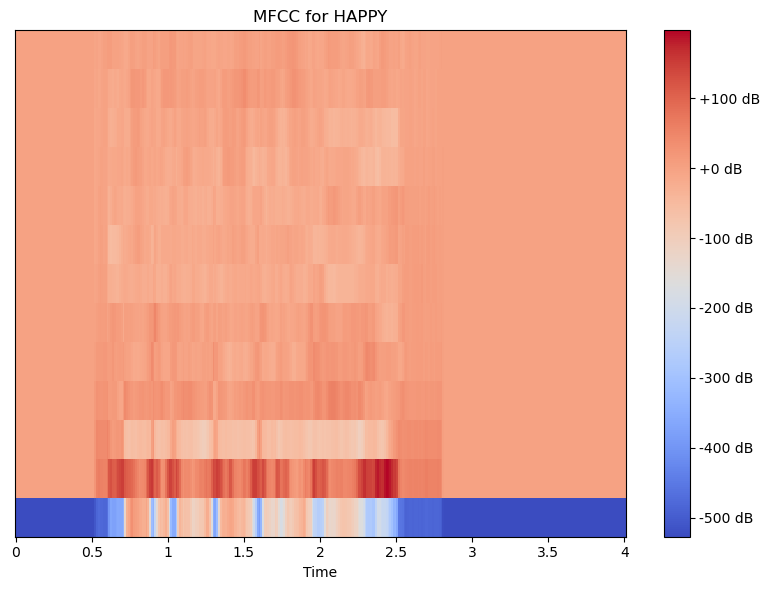

Plotting MFCC for F:/MS Thesis/Research/Voice\SAD\F_01_OISHI_S_10_SAD_1.wav (Emotion: SAD)


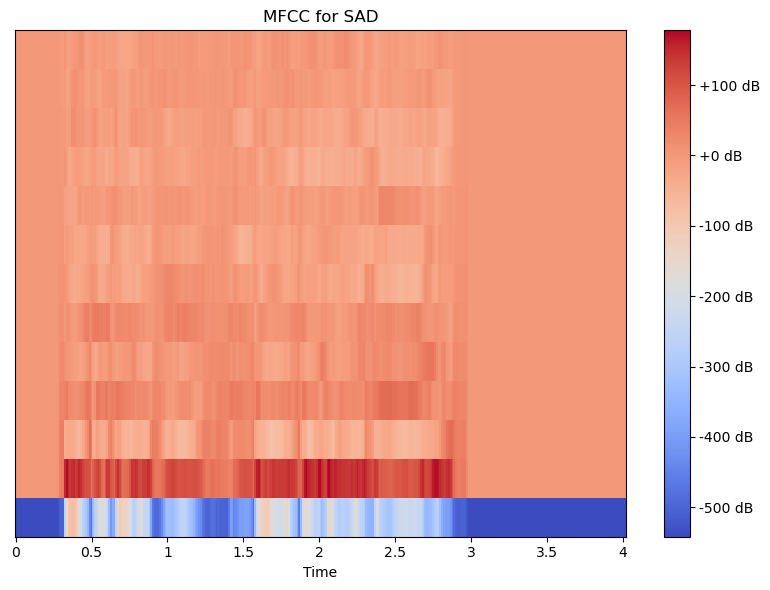

Plotting MFCC for F:/MS Thesis/Research/Voice\SURPRISE\F_01_OISHI_S_10_SURPRISE_1.wav (Emotion: SURPRISE)


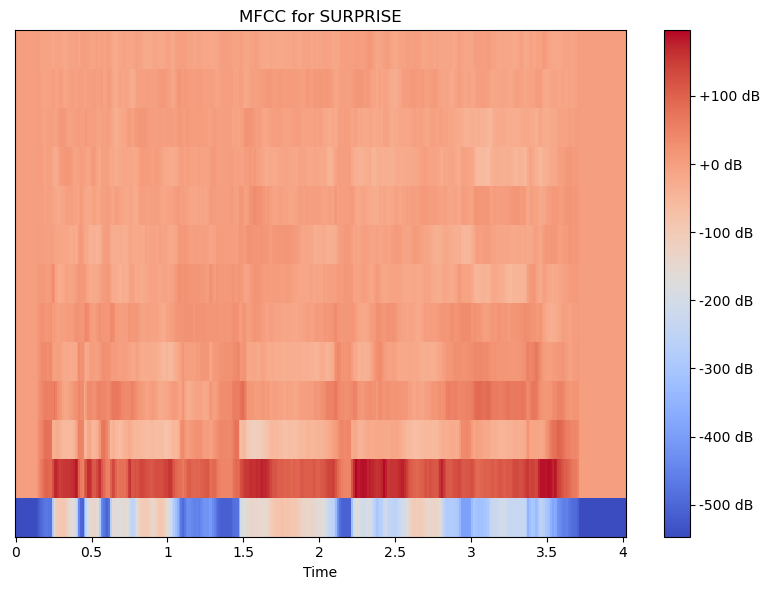

In [7]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Paths to your dataset and features folder
data_path = 'F:/MS Thesis/Research/Voice'
features_path = 'F:/MS Thesis/Research/NewFeatures'

# Function to plot MFCC for a given audio file
def plot_mfcc(file_path, emotion):
    print(f"Plotting MFCC for {file_path} (Emotion: {emotion})")
    try:
        # Load the audio file
        y, sr = librosa.load(file_path, sr=None)
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")
        return  # Exit if there's an error loading the file

    # Extract MFCC features
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # Plot the MFCC
    plt.figure(figsize=(8, 6))
    librosa.display.specshow(mfcc, x_axis='time', sr=sr)
    plt.title(f'MFCC for {emotion}')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()

    # Save or show the plot
    output_path = os.path.join(features_path, f'mfcc_{emotion}.png')
    try:
        plt.show()
    except Exception as e:
        print(f"Error displaying plot: {e}")
        plt.savefig(output_path)
        print(f"Plot saved as {output_path}")

# Ensure the features_path exists
if not os.path.exists(features_path):
    os.makedirs(features_path)

# Iterate through each emotion folder and plot MFCC for one file
for emotion in os.listdir(data_path):
    emotion_folder = os.path.join(data_path, emotion)
    if os.path.isdir(emotion_folder):  # Ensure it's a folder
        # Get one .wav file from the emotion folder
        files = [f for f in os.listdir(emotion_folder) if f.endswith('.wav')]
        if files:
            file_path = os.path.join(emotion_folder, files[0])  # Select the first file
            plot_mfcc(file_path, emotion)
        else:
            print(f"No .wav files found in {emotion_folder}")
